# Include libraries etc.
Include the libs, set the plot to be displayed in the notebook, and also set the figure size.

In [84]:
import requests
import datetime
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math, pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# Load data
Load the **San Francisco incidents data for 2014 summer** from github as csv into the dataframe sf_data 

In [4]:
url = "https://raw.githubusercontent.com/uwescience/datasci_course_materials/master/assignment6/sanfrancisco_incidents_summer_2014.csv"
sf_data = pd.read_csv(url, index_col='DateTime', parse_dates={'DateTime':['Date','Time']})

# Take a look at the data
Just take a look...

In [5]:
sf_data.head()

,IncidntNum,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Location,PdId
DateTime,,,,,,,,,,,
2014-08-31 23:50:00,140734311,ARSON,ARSON OF A VEHICLE,Sunday,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
2014-08-31 23:45:00,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2014-08-31 23:30:00,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
2014-08-31 23:30:00,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
2014-08-31 23:23:00,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000


#  How do incidents vary by neighborhood?  More incidents at city center
Plotting the Incident Numbers as circles for each location, we see the address with highest Indicent Number in summer 2014 was **800 Block of BRYANT ST**, which has **940** incidents (*very high if comparing to the second most 224 incidents at 900 Block of POTRERO AV*).

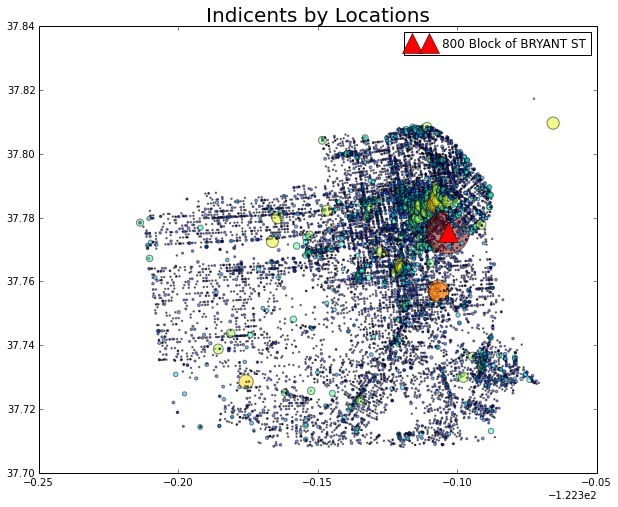

               X          Y                   Address  count
8049 -122.403405  37.775421    800 Block of BRYANT ST    940
7537 -122.406605  37.757158   900 Block of POTRERO AV    224
7551 -122.406539  37.756486  1000 Block of POTRERO AV    196
7358 -122.407634  37.784189    800 Block of MARKET ST    150
5236 -122.419672  37.765050      16TH ST / MISSION ST    116


In [91]:
location_groups = sf_data.groupby(['X', 'Y', 'Address'])['IncidntNum'].count()
all_locations = pd.DataFrame({'count' : location_groups}).reset_index()
incident_counts = list(all_locations['count'] * 2)
area = incident_counts
colors = np.log(incident_counts)
plt.scatter(list(all_locations['X']), list(all_locations['Y']), s=area, c=colors, alpha=0.5)
top = all_locations.sort('count', ascending=False).head(1)
plt.plot(top['X'], top['Y'], 'r^', ms=20, label=list(top['Address'])[0])
plt.title('Indicents by Locations', fontsize=20)
plt.legend()
plt.show()
print(all_locations.sort('count', ascending=False).head())

# In what areas or neighborhoods are thefts most common?   800 Block of BRYANT ST

The most common incidents overall is **LARCENY/THEFT**, which has **9466** incidents comparing to the second most that is only 3567. 

In [59]:
category_groups = sf_data.groupby('Category')['IncidntNum'].count()
all_categories = pd.DataFrame({'count' : category_groups}).reset_index()
print(all_categories.sort('count', ascending=False).head())

          Category  count
15   LARCENY/THEFT   9466
20  OTHER OFFENSES   3567
19    NON-CRIMINAL   3023
1          ASSAULT   2882
31   VEHICLE THEFT   1966


If we only consider LARCENY/THEFT, **800 Block of BRYANT ST** is still the location that has the most incidents (*454, comparing to the second most which was only 68 at 800 Block of MARKET ST*).

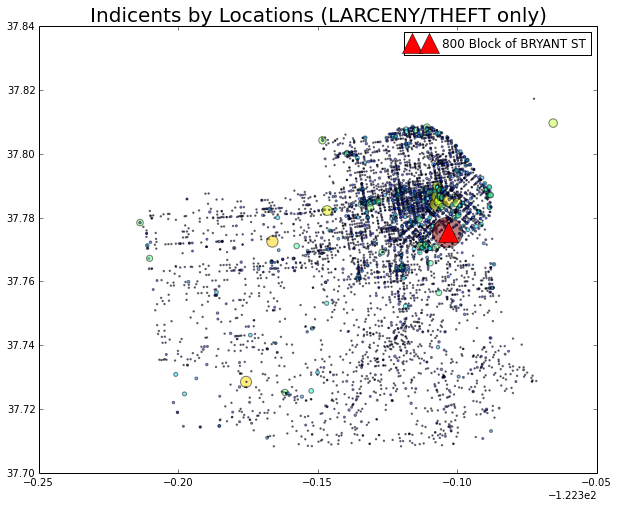

               X          Y                       Address  count
3891 -122.403405  37.775421        800 Block of BRYANT ST    454
3522 -122.407634  37.784189        800 Block of MARKET ST     68
474  -122.466205  37.772541  500 Block of JOHNFKENNEDY DR     64
3921 -122.403070  37.785269       700 Block of MISSION ST     62
345  -122.475647  37.728528         3200 Block of 20TH AV     61


In [89]:
theft_data = sf_data[sf_data['Category'] == 'LARCENY/THEFT']
location_groups = theft_data.groupby(['X', 'Y', 'Address'])['IncidntNum'].count()
all_locations = pd.DataFrame({'count' : location_groups}).reset_index()
incident_counts = list(all_locations['count'] * 2)
area = incident_counts
colors = np.log(incident_counts)
plt.scatter(list(all_locations['X']), list(all_locations['Y']), s=area, c=colors, alpha=0.5)
top = all_locations.sort('count', ascending=False).head(1)
plt.plot(top['X'], top['Y'], 'r^', ms=20, label=list(top['Address'])[0])
plt.legend()
plt.title('Indicents by Locations (LARCENY/THEFT only)', fontsize=20)
plt.show()
print(all_locations.sort('count', ascending=False).head())

# Which incidents are most common in the city center?  Theft
Plot bar chart for all incidents categories at **800 Block of BRYANT ST** we see **LARCENY/THEFT** is most common.

          Category  count
7    LARCENY/THEFT    456
10    NON-CRIMINAL    124
11  OTHER OFFENSES     84
19        WARRANTS     62
1          ASSAULT     61


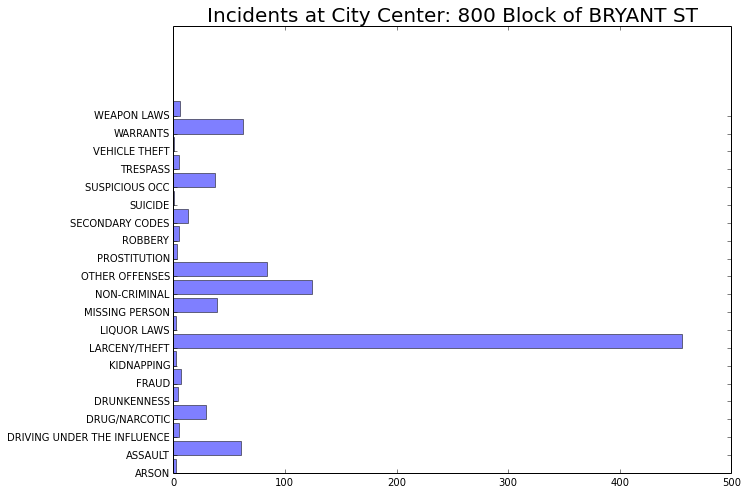

In [109]:
city_center_data = sf_data[sf_data['Address']=='800 Block of BRYANT ST']
city_center_category_groups = city_center_data.groupby(['Category'])['IncidntNum'].count()
city_center_categories = pd.DataFrame({'count' : city_center_category_groups}).reset_index()
print(city_center_categories.sort('count', ascending=False).head())
plt.barh(list(city_center_categories.index), list(city_center_categories['count']), alpha=0.5)
plt.yticks(list(city_center_categories.index), list(city_center_categories['Category']))
#plt.legend()
plt.title('Incidents at City Center: 800 Block of BRYANT ST', fontsize=20)
plt.show()

# Dominant Location on Treasure Island
Another minor finding was that almost all incidents on Treasure Island was reported at **200 Block of INTERSTATE80 HY** (*74 out of 75, where the only exeption was a LARCENY/THEFT incicent reported at AVENUE OF THE PALMS / CALIFORNIA ST*). 

### From the indicent location plot we see there are two locations on Treasure Island

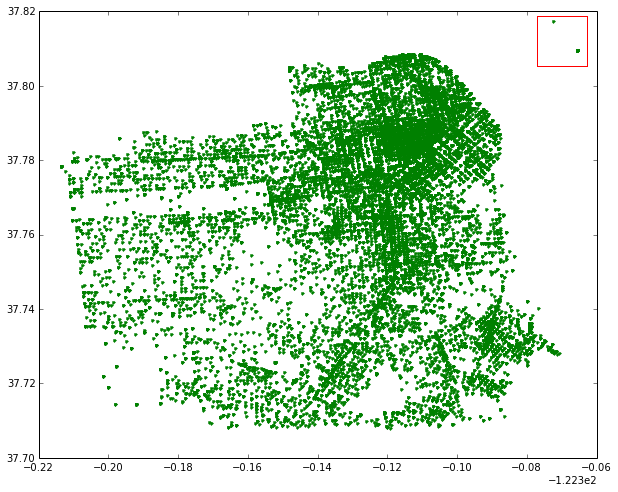

In [61]:
fig = plt.figure()
ax = plt.axes()
ax.plot(sf_data['X'], sf_data['Y'], 'g.')
ax.plot(-122.37, 37.812, 's', ms=50, mec='red', mfc='none', mew=1)

### But almost all indicents (74/75) were reported at one location on the Island

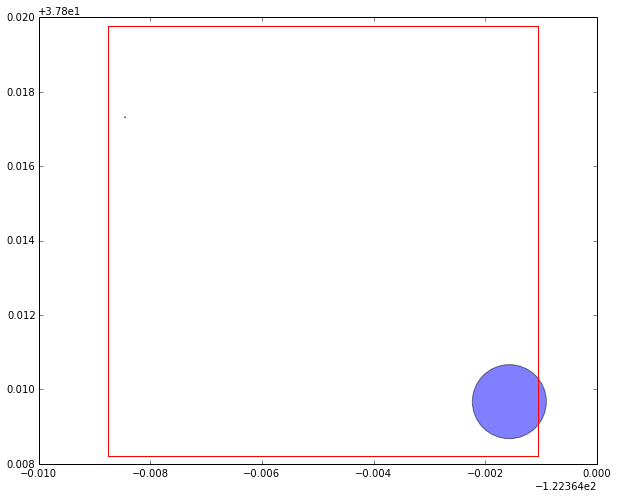

In [70]:
freq = pd.DataFrame({'count' : outlier}).reset_index()
area = list(freq['count'])
area = np.square(area)
plt.scatter(list(freq['X']), list(freq['Y']), s=area, alpha=0.5)
plt.plot(-122.3689, 37.814, 's', ms=430, mec='red', mfc='none', mew=1)
plt.show()

In [71]:
outlier = sf_data[(sf_data['X']> -122.38) & (sf_data['Y']> 37.8)]
outlier = outlier.groupby(['X', 'Y', 'Address'])['IncidntNum'].count()
outlier

X            Y          Address                            
-122.372451  37.817315  AVENUE OF THE PALMS / CALIFORNIA ST     1
-122.365565  37.809671  200 Block of INTERSTATE80 HY           74
Name: IncidntNum, dtype: int64